In [1247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import sklearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

# data read

In [1248]:
dataset = pd.read_csv('diabetes_dataset__2019_.csv')

In [1249]:
dataset.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


# data analysis

In [1250]:
dataset.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [1251]:
dataset.shape

(952, 18)

In [1252]:
dataset.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [1253]:
dataset.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

In [1254]:
dataset.isnull().sum().sum()


48

# remove null

In [1255]:
fill_bmi = dataset.BMI.mean()

In [1256]:
dataset.BMI = dataset.BMI.fillna(fill_bmi)

In [1257]:
dataset.BMI.isnull().sum()

0

In [1258]:
dataset.dropna(subset=['Pdiabetes', 'Diabetic'], inplace=True)

In [1259]:
fill_preg = dataset.Pregancies.median()

In [1260]:
dataset.Pregancies = dataset.Pregancies.fillna(fill_preg)

In [1261]:
dataset.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

# imbalanced data check

Text(0, 0.5, 'Frequency')

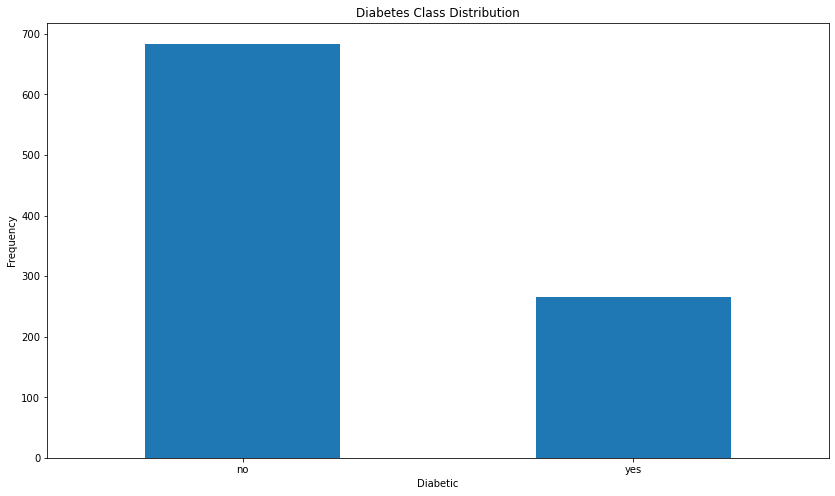

In [1262]:
count_classes = pd.value_counts(dataset['Diabetic'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Diabetes Class Distribution")
plt.xlabel("Diabetic")
plt.ylabel("Frequency")

# data visualization

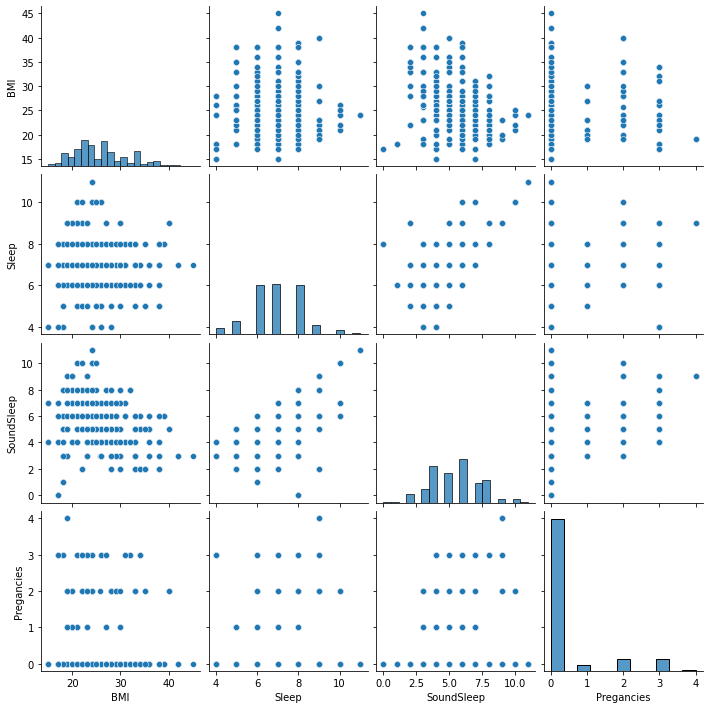

In [1263]:
sns.pairplot(dataset)

# one hot encoding

In [1264]:
dummie_ph = pd.get_dummies(dataset['PhysicallyActive'])

In [1265]:
dummie_ph

,less than half an hr,more than half an hr,none,one hr or more
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
947,0,1,0,0
948,0,1,0,0
949,0,0,1,0
950,1,0,0,0


In [1266]:
dummie_j = pd.get_dummies(dataset['JunkFood'])

In [1267]:
dummie_j

,always,occasionally,often,very often
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
947,0,0,1,0
948,0,1,0,0
949,0,1,0,0
950,0,1,0,0


In [1268]:
dummie_s = pd.get_dummies(dataset['Stress'])

In [1269]:
dummie_s

,always,not at all,sometimes,very often
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
947,0,0,1,0
948,0,0,1,0
949,0,0,1,0
950,0,0,0,1


In [1270]:
dummie_bpl = pd.get_dummies(dataset['BPLevel'])

In [1271]:
marge = pd.concat([dataset,dummie_ph,dummie_j,dummie_s,dummie_bpl], axis = 'columns')

In [1272]:
marge

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,...,occasionally,often,very often,always,not at all,sometimes,very often,high,low,normal
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,...,1,0,0,0,0,1,0,1,0,0
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,...,0,0,1,0,0,1,0,0,0,1
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,...,1,0,0,0,0,1,0,0,0,1
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,...,1,0,0,0,0,1,0,0,0,1
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,...,0,1,0,0,0,1,0,0,0,1
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,...,1,0,0,0,0,1,0,1,0,0
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,...,1,0,0,0,0,1,0,1,0,0
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,...,1,0,0,0,0,0,1,1,0,0


In [1273]:
drop_phy = marge.drop(['PhysicallyActive'],axis = 'columns')

In [1274]:
drop_junkfood = drop_phy.drop(['JunkFood'],axis = 'columns')

In [1275]:
drop_stress = drop_junkfood.drop(['Stress'],axis = 'columns')

In [1276]:
one_hot_final = drop_stress.drop(['BPLevel'],axis = 'columns')

In [1277]:
one_hot_final.shape

(950, 29)

# label encoding

In [1278]:
from sklearn.preprocessing import LabelEncoder

In [1279]:
lb_en = LabelEncoder()

In [1280]:
label_age = lb_en.fit_transform(one_hot_final['Age'])

In [1281]:
label_gender = lb_en.fit_transform(one_hot_final['Gender'])

In [1282]:
label_family = lb_en.fit_transform(one_hot_final['Family_Diabetes'])

In [1283]:
label_bp = lb_en.fit_transform(one_hot_final['highBP'])

In [1284]:
label_smoke = lb_en.fit_transform(one_hot_final['Smoking'])

In [1285]:
label_alco = lb_en.fit_transform(one_hot_final['Alcohol'])

In [1286]:
label_medi = lb_en.fit_transform(one_hot_final['RegularMedicine'])

In [1287]:
label_urin = lb_en.fit_transform(one_hot_final['UriationFreq'])

In [1288]:
label_pdiabetes = lb_en.fit_transform(one_hot_final['Pdiabetes'])

In [1289]:
label_diabetic = lb_en.fit_transform(one_hot_final['Diabetic'])

# drop

In [1290]:
drop_age = one_hot_final.drop('Age',axis = 'columns')

In [1291]:
drop_gender = drop_age.drop('Gender',axis = 'columns')

In [1292]:
drop_family_diabetec = drop_gender.drop('Family_Diabetes',axis = 'columns') 

In [1293]:
drop_bp = drop_family_diabetec.drop('highBP',axis = 'columns')

In [1294]:
drop_smoke = drop_bp.drop('Smoking',axis = 'columns')

In [1295]:
drop_alco = drop_smoke.drop('Alcohol',axis = 'columns')

In [1296]:
after_medi = drop_alco.drop('RegularMedicine', axis = 'columns')

In [1297]:
after_pdiabetes = after_medi.drop('Pdiabetes', axis = 'columns')

In [1298]:
after_urin = after_pdiabetes.drop('UriationFreq', axis = 'columns')

In [1299]:
after_drop = after_urin.drop('Diabetic', axis = 'columns')

In [1300]:
after_drop

,BMI,Sleep,SoundSleep,Pregancies,less than half an hr,more than half an hr,none,one hr or more,always,occasionally,often,very often,always,not at all,sometimes,very often,high,low,normal
0,39.0,8,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,28.0,8,6,0.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,24.0,6,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,23.0,8,6,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,27.0,8,8,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
948,27.0,6,5,0.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
949,23.0,6,5,0.0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
950,27.0,6,5,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0


# concate

In [1301]:
after_drop['Age'] = label_age

In [1302]:
after_drop['Gender'] = label_gender

In [1303]:
after_drop['Family_diabetes'] = label_family

In [1304]:
after_drop['highBP'] = label_bp

In [1305]:
after_drop['Smoking'] = label_smoke

In [1306]:
after_drop['Alcohol'] = label_alco

In [1307]:
after_drop['RegularMedicine'] = label_medi

In [1308]:
after_drop['Pdiabetes'] = label_pdiabetes

In [1309]:
after_drop['UriationFreq'] = label_urin

In [1310]:
after_drop['Diabetic'] = label_diabetic

In [1311]:
final = after_drop

In [1312]:
final.isnull().sum()

BMI                     0
Sleep                   0
SoundSleep              0
Pregancies              0
less than half an hr    0
more than half an hr    0
none                    0
one hr or more          0
always                  0
occasionally            0
often                   0
very often              0
always                  0
not at all              0
sometimes               0
very often              0
high                    0
low                     0
normal                  0
Age                     0
Gender                  0
Family_diabetes         0
highBP                  0
Smoking                 0
Alcohol                 0
RegularMedicine         0
Pdiabetes               0
UriationFreq            0
Diabetic                0
dtype: int64

# train test

In [1313]:
y = final['Diabetic']

In [1314]:
x = final.drop('Diabetic',axis=1)

# handling imbalanced datasets

In [1315]:
SMOTE = SMOTE()

# feature selection

In [1316]:
from sklearn.feature_selection import SelectKBest, chi2

In [1317]:
select_feature = SelectKBest(score_func = chi2,k=17)

In [1318]:
select_feature.fit(x,y)

SelectKBest(k=17, score_func=<function chi2 at 0x000002E72CCECA60>)

In [1319]:
score_col = pd.DataFrame(select_feature.scores_,columns = ['score_value'])

In [1320]:
score_col

,score_value
0,16.457792
1,0.950074
2,0.001862
3,115.262468
4,1.812382
5,2.583289
6,12.229497
7,0.569059
8,2.103896
9,1.329365


In [1321]:
feature_col  = pd.DataFrame(x.columns)

In [1322]:
top_feature = pd.concat([feature_col, score_col], axis=1)

In [1323]:
top_feature

,0,score_value
0,BMI,16.457792
1,Sleep,0.950074
2,SoundSleep,0.001862
3,Pregancies,115.262468
4,less than half an hr,1.812382
5,more than half an hr,2.583289
6,none,12.229497
7,one hr or more,0.569059
8,always,2.103896
9,occasionally,1.329365


In [1324]:
top = top_feature.nlargest(17,'score_value')

# mutual classif

In [1325]:
#from sklearn.feature_selection import mutual_info_classif

In [1326]:
#mutual_info = mutual_info_classif(x, y)

In [1327]:
#mutual_info

In [1328]:
#from sklearn.feature_selection import SelectKBest

In [1329]:
#select_feature = SelectKBest(mutual_info_classif,k=17)

In [1330]:
#select_feature.fit(x,y)

In [1331]:
#score_col = pd.DataFrame(select_feature.scores_,columns = ['score_value'])

In [1332]:
#score_col

In [1333]:
#feature_col  = pd.DataFrame(x.columns)

In [1334]:
#top_feature.nlargest(17,'score_value')

In [1335]:
x = final[['RegularMedicine','Age','high','normal','highBP','BMI','always','sometimes','more than half an hr','Pregancies','one hr or more','UriationFreq','low','always','Sleep','Family_diabetes','Pdiabetes']] 

# feature scalling

In [1336]:
from sklearn.preprocessing import StandardScaler

In [1337]:
standard = StandardScaler()

In [1338]:
x_stand = standard.fit_transform(x)

# spliting .30

In [1339]:
from sklearn.model_selection import train_test_split

In [1340]:
xtrain,xtest,ytrain,ytest = train_test_split(x_stand,y,test_size = .30,random_state = 1)

In [1341]:
print("Before oversampling: ",Counter(ytrain))

Before oversampling:  Counter({0: 479, 1: 186})


# handling imbalanced data

In [1342]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [1343]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 479, 1: 479})


# logistic regression

In [1344]:
from sklearn.linear_model import LogisticRegression

In [1345]:
balance_lr = LogisticRegression()
imbalance_lr = LogisticRegression()

In [1346]:
balance_lr.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [1347]:
imbalance_lr.fit(xtrain,ytrain)

LogisticRegression()

In [1348]:
balance_predict = balance_lr.predict(xtest)
balance_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1349]:
imbalance_predict = imbalance_lr.predict(xtest)
imbalance_predict

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1350]:
balance_lr.score(xtest,ytest)

0.8842105263157894

In [1351]:
imbalance_lr.score(xtest,ytest)

0.9122807017543859

In [1352]:
from sklearn.metrics import accuracy_score

In [1353]:
balance_accuracy = accuracy_score(ytest,balance_predict)
balance_accuracy

0.8842105263157894

In [1354]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict)
imbalance_accuracy

0.9122807017543859

In [1355]:
balance_l_accuracy = balance_accuracy*100
balance_l_accuracy

88.42105263157895

In [1356]:
imbalance_l_accuracy = imbalance_accuracy*100
imbalance_l_accuracy

91.22807017543859

# comparison

In [1357]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = balance_predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,1
735,1,1
545,1,1
311,1,1
868,0,1
852,0,0
35,1,1
78,0,0


In [1358]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = imbalance_predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,0
845,0,0
416,0,1
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,1
78,0,0


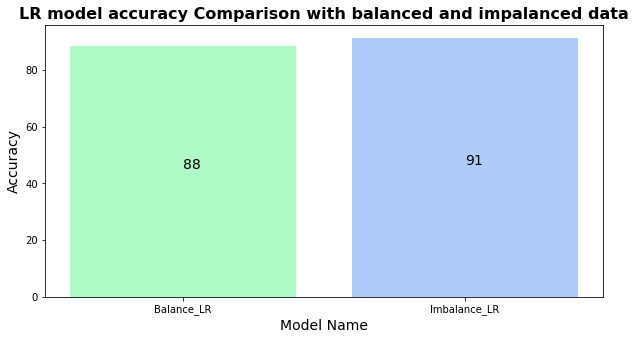

In [1359]:
accuracy_compare_1 = [balance_l_accuracy, imbalance_l_accuracy]
model_names = ['Balance_LR', 'Imbalance_LR']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy_compare_1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('LR model accuracy Comparison with balanced and impalanced data', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

# confucion matrix

In [1360]:
from sklearn.metrics import confusion_matrix

In [1361]:
balance_conf = confusion_matrix(ytest,balance_predict)
balance_conf

array([[180,  25],
       [  8,  72]], dtype=int64)

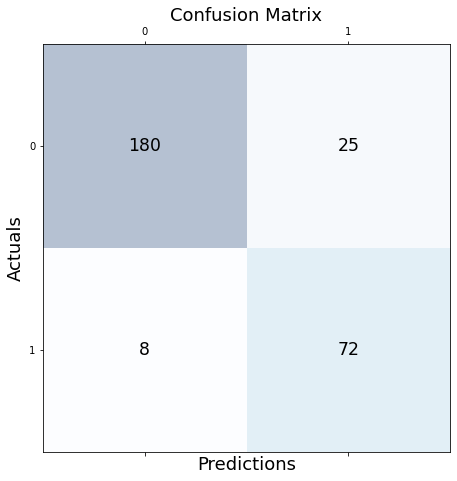

In [1362]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1363]:
imbalance_conf = confusion_matrix(ytest,imbalance_predict)
imbalance_conf

array([[193,  12],
       [ 13,  67]], dtype=int64)

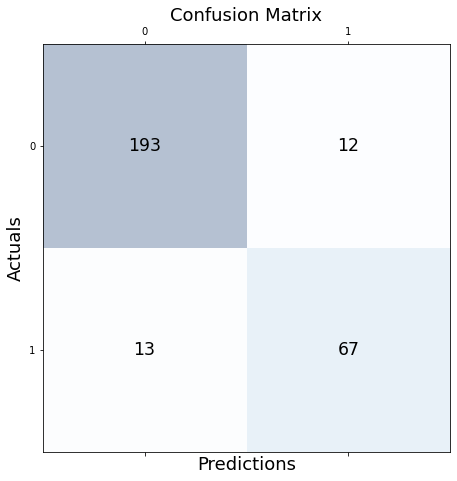

In [1364]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1365]:
from sklearn.metrics import classification_report

In [1366]:
print(classification_report(ytest,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       205
           1       0.74      0.90      0.81        80

    accuracy                           0.88       285
   macro avg       0.85      0.89      0.86       285
weighted avg       0.90      0.88      0.89       285



In [1367]:
print(classification_report(ytest,imbalance_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       205
           1       0.85      0.84      0.84        80

    accuracy                           0.91       285
   macro avg       0.89      0.89      0.89       285
weighted avg       0.91      0.91      0.91       285



# support vector machine

In [1368]:
from sklearn.svm import SVC

In [1369]:
balance_model = SVC()

In [1370]:
imbalance_model = SVC()

In [1371]:
balance_model.fit(X_train_SMOTE,y_train_SMOTE)

SVC()

In [1372]:
imbalance_model.fit(xtrain,ytrain)

SVC()

In [1373]:
balance_predict = balance_model.predict(xtest)
balance_predict

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1374]:
imbalance_predict = imbalance_model.predict(xtest)
imbalance_predict

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1375]:
balance_model.score(xtest,ytest)

0.9368421052631579

In [1376]:
imbalance_model.score(xtest,ytest)

0.9333333333333333

# comparison

In [1377]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = balance_predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,0
735,1,1
545,1,1
311,1,1
868,0,1
852,0,0
35,1,1
78,0,0


In [1378]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = imbalance_predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,0
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,1
78,0,0


# evaluation

In [1379]:
from sklearn.metrics import accuracy_score

In [1380]:
balance_predict = balance_model.predict(xtest)

In [1381]:
imbalance_predict = imbalance_model.predict(xtest)

In [1382]:
balance_accuracy = accuracy_score(ytest,balance_predict)

In [1383]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict)

In [1384]:
balance_s_accuracy = balance_accuracy*100
balance_s_accuracy

93.6842105263158

In [1385]:
imbalance_s_accuracy = imbalance_accuracy*100
imbalance_s_accuracy

93.33333333333333

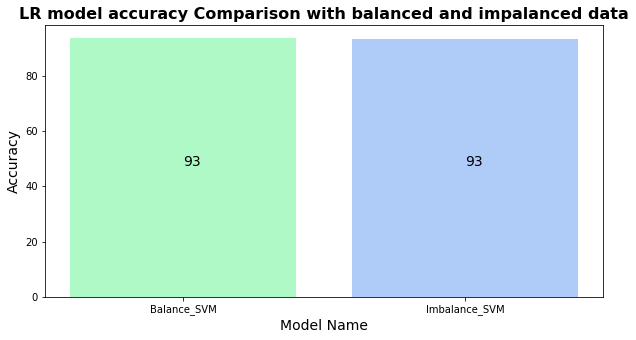

In [1386]:
accuracy_compare_2 = [balance_s_accuracy, imbalance_s_accuracy]
model_names = ['Balance_SVM', 'Imbalance_SVM']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy_compare_2, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('LR model accuracy Comparison with balanced and impalanced data', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

In [1387]:
from sklearn.metrics import confusion_matrix

In [1388]:
balance_conf = confusion_matrix(ytest,balance_predict)
balance_conf

array([[195,  10],
       [  8,  72]], dtype=int64)

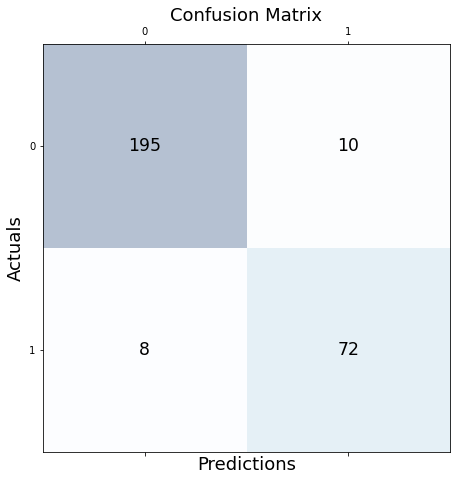

In [1389]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1390]:
imbalance_conf = confusion_matrix(ytest,imbalance_predict)
imbalance_conf

array([[200,   5],
       [ 14,  66]], dtype=int64)

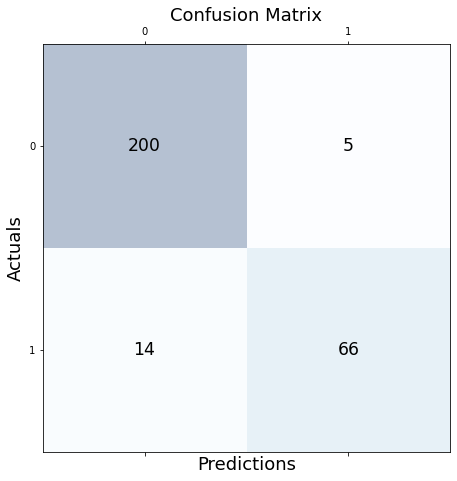

In [1391]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1392]:
from sklearn.metrics import classification_report

In [1393]:
print(classification_report(ytest,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       205
           1       0.88      0.90      0.89        80

    accuracy                           0.94       285
   macro avg       0.92      0.93      0.92       285
weighted avg       0.94      0.94      0.94       285



In [1394]:
print(classification_report(ytest,imbalance_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       205
           1       0.93      0.82      0.87        80

    accuracy                           0.93       285
   macro avg       0.93      0.90      0.91       285
weighted avg       0.93      0.93      0.93       285



# naive bayes

In [1395]:
from sklearn.naive_bayes import MultinomialNB
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .30,random_state = 1)

In [1396]:
reg = MultinomialNB()

In [1397]:
reg.fit(xtrain,ytrain)

MultinomialNB()

In [1398]:
predict = reg.predict(xtest)
predict

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [1399]:
reg.score(xtest,ytest)

0.8596491228070176

# comparison

In [1400]:
dataset_pred= pd.DataFrame()
dataset_pred['Actual Values'] = ytest
dataset_pred['Predicted Values'] = predict

dataset_pred.head(10)

,Actual Values,Predicted Values
243,1,1
845,0,0
416,0,1
735,1,1
545,1,1
311,1,1
868,0,0
852,0,0
35,1,0
78,0,0


# Evaluation

In [1401]:
accuracy = accuracy_score(ytest,predict)

In [1402]:
n_accuracy  = accuracy*100
n_accuracy

85.96491228070175

In [1403]:
reg_conf = confusion_matrix(ytest,predict)
reg_conf

array([[182,  23],
       [ 17,  63]], dtype=int64)

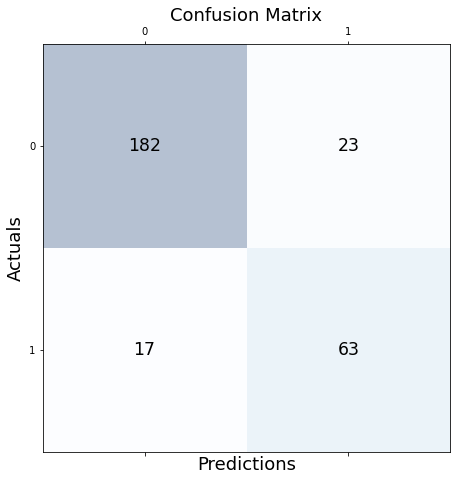

In [1404]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(reg_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(reg_conf.shape[0]):
    for j in range(reg_conf.shape[1]):
        ax.text(x=j, y=i,s=reg_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1405]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       205
           1       0.73      0.79      0.76        80

    accuracy                           0.86       285
   macro avg       0.82      0.84      0.83       285
weighted avg       0.86      0.86      0.86       285



# spliting .25

In [1406]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size = .25,random_state = 1)

In [1407]:
print("Before oversampling: ",Counter(y1train))

Before oversampling:  Counter({0: 513, 1: 199})


# balanced data

In [1408]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x1train, y1train)
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 513, 1: 513})


In [1409]:
balance_lr.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [1410]:
imbalance_lr.fit(x1train,y1train)

LogisticRegression()

In [1411]:
balance_lr.score(x1test,y1test)

0.8823529411764706

In [1412]:
imbalance_lr.score(x1test,y1test)

0.8991596638655462

In [1413]:
balance_predict = balance_lr.predict(x1test)

In [1414]:
imbalance_predict = imbalance_lr.predict(x1test)

In [1415]:
balance_accuracy = accuracy_score(y1test,balance_predict)
balance_accuracy

0.8823529411764706

In [1416]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict)
imbalance_accuracy

0.8991596638655462

In [1417]:
balance_l1_accuracy = balance_accuracy*100
balance_l1_accuracy

88.23529411764706

In [1418]:
imbalance_l1_accuracy = imbalance_accuracy*100
imbalance_l1_accuracy

89.91596638655463

# comparison

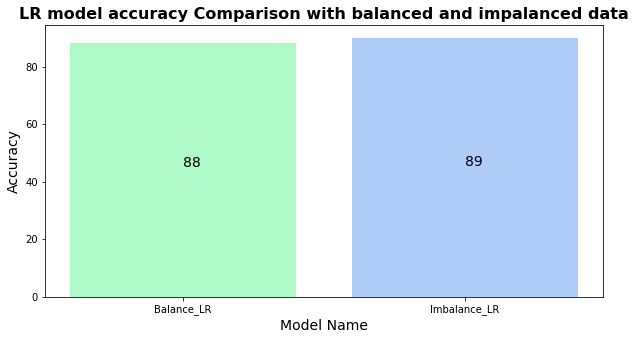

In [1419]:
accuracy_compare_3 = [balance_l1_accuracy, imbalance_l1_accuracy]
model_names = ['Balance_LR', 'Imbalance_LR']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy_compare_3, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('LR model accuracy Comparison with balanced and impalanced data', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

# confusion matrix

In [1420]:
balance_conf = confusion_matrix(y1test,balance_predict)
balance_conf

array([[151,  20],
       [  8,  59]], dtype=int64)

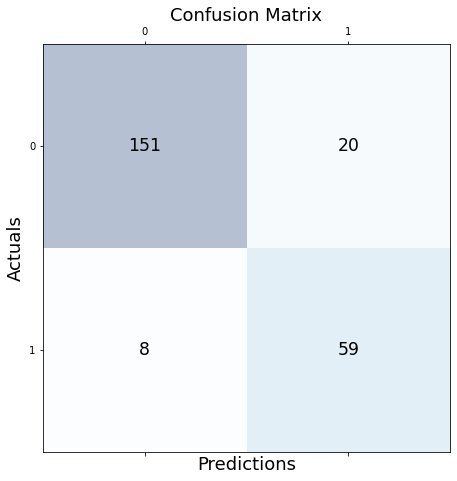

In [1421]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1422]:
imbalance_conf = confusion_matrix(y1test,imbalance_predict)
imbalance_conf

array([[162,   9],
       [ 15,  52]], dtype=int64)

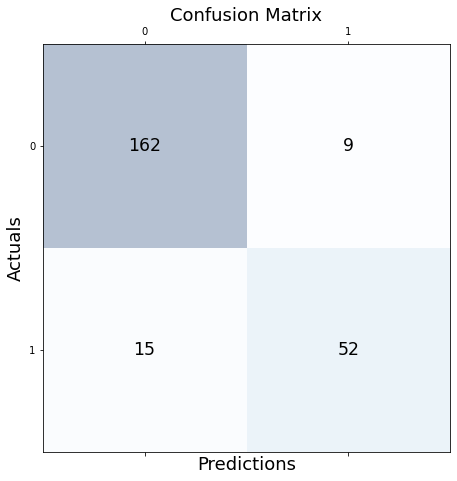

In [1423]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1424]:
print(classification_report(y1test,balance_predict))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       171
           1       0.75      0.88      0.81        67

    accuracy                           0.88       238
   macro avg       0.85      0.88      0.86       238
weighted avg       0.89      0.88      0.89       238



In [1425]:
print(classification_report(y1test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       171
           1       0.85      0.78      0.81        67

    accuracy                           0.90       238
   macro avg       0.88      0.86      0.87       238
weighted avg       0.90      0.90      0.90       238



# support vector machine

In [1426]:
balance_model.fit(X_train_SMOTE,y_train_SMOTE)

SVC()

In [1427]:
imbalance_model.fit(x1train,y1train)

SVC()

In [1428]:
balance_model.score(x1test,y1test)

0.9453781512605042

In [1429]:
imbalance_model.score(x1test,y1test)

0.9327731092436975

In [1430]:
balance_predict = balance_model.predict(x1test)
imbalance_predict = imbalance_model.predict(x1test)

In [1431]:
balance_accuracy = accuracy_score(y1test,balance_predict)
balance_accuracy

0.9453781512605042

In [1432]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict)
imbalance_accuracy

0.9327731092436975

In [1433]:
balance_s1_accuracy = balance_accuracy*100
balance_s1_accuracy

94.53781512605042

In [1434]:
imbalance_s1_accuracy = imbalance_accuracy*100
imbalance_s1_accuracy

93.27731092436974

In [1435]:
balance_conf = confusion_matrix(y1test,balance_predict)
balance_conf

array([[164,   7],
       [  6,  61]], dtype=int64)

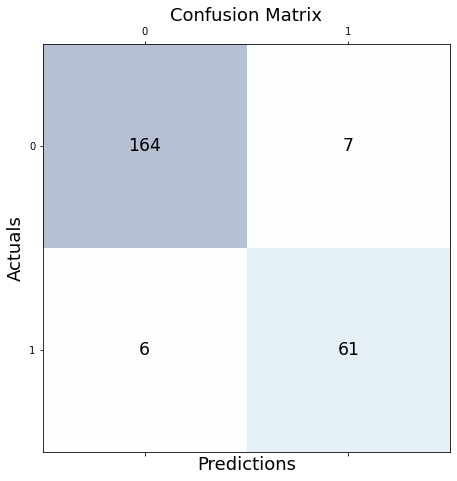

In [1436]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1437]:
imbalance_conf = confusion_matrix(y1test,imbalance_predict)
imbalance_conf

array([[168,   3],
       [ 13,  54]], dtype=int64)

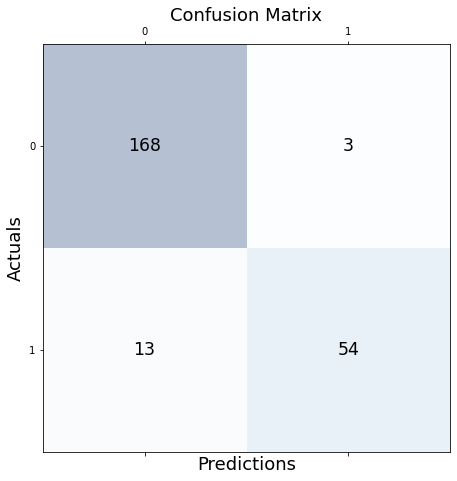

In [1438]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1439]:
print(classification_report(y1test,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       171
           1       0.90      0.91      0.90        67

    accuracy                           0.95       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.95      0.95      0.95       238



In [1440]:
print(classification_report(y1test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       171
           1       0.95      0.81      0.87        67

    accuracy                           0.93       238
   macro avg       0.94      0.89      0.91       238
weighted avg       0.93      0.93      0.93       238



# naive bayes

In [1441]:
x1train,x1test,y1train,y1test = train_test_split(x,y,test_size = .25,random_state = 1)
reg.fit(x1train,y1train)

MultinomialNB()

In [1442]:
predict = reg.predict(x1test)

In [1443]:
accuracy = accuracy_score(y1test,predict)

In [1444]:
n1_accuracy = accuracy*100
n1_accuracy

85.71428571428571

In [1445]:
imbalance_conf = confusion_matrix(y1test,predict)
imbalance_conf

array([[152,  19],
       [ 15,  52]], dtype=int64)

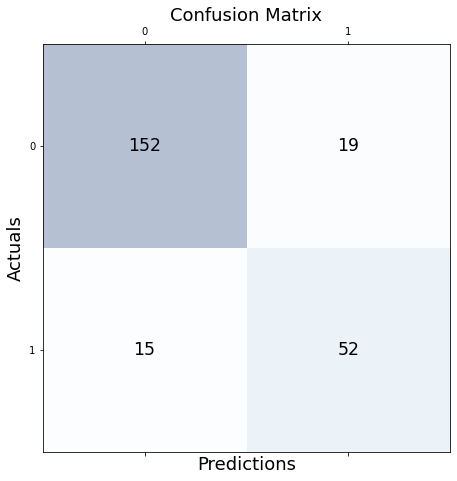

In [1446]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1447]:
print(classification_report(y1test,predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       171
           1       0.73      0.78      0.75        67

    accuracy                           0.86       238
   macro avg       0.82      0.83      0.83       238
weighted avg       0.86      0.86      0.86       238



# spliting .40

In [1448]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size = .40,random_state = 1)

In [1449]:
print("Before oversampling: ",Counter(y2train))

Before oversampling:  Counter({0: 410, 1: 160})


# balanced data

In [1450]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1451]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 410, 1: 410})


In [1452]:
balance_lr.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [1453]:
imbalance_lr.fit(x2train,y2train)

LogisticRegression()

In [1454]:
balance_predict = balance_lr.predict(x2test)

In [1455]:
imbalance_predict = imbalance_lr.predict(x2test)

In [1456]:
balance_accuracy = accuracy_score(y2test,balance_predict)

In [1457]:
imbalance_accuracy = accuracy_score(y2test,imbalance_predict)

In [1458]:
balance_l2_accuracy = balance_accuracy*100
balance_l2_accuracy

86.8421052631579

In [1459]:
imbalance_l2_accuracy = imbalance_accuracy*100
imbalance_l2_accuracy

88.94736842105263

In [1460]:
balance_conf = confusion_matrix(y2test,balance_predict)
balance_conf

array([[235,  39],
       [ 11,  95]], dtype=int64)

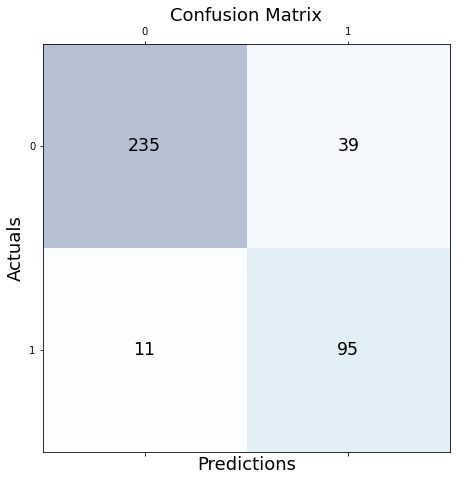

In [1461]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1462]:
imbalance_conf = confusion_matrix(y2test,imbalance_predict)
imbalance_conf

array([[249,  25],
       [ 17,  89]], dtype=int64)

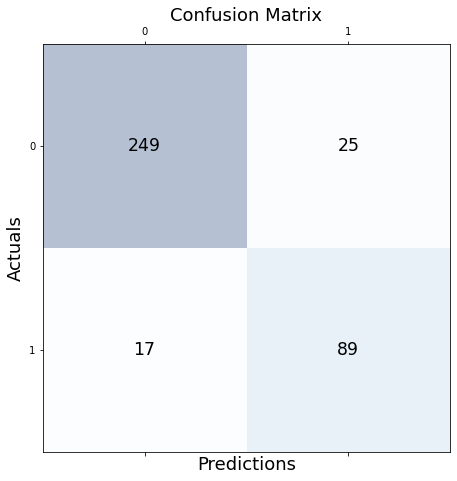

In [1463]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1464]:
print(classification_report(y2test,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90       274
           1       0.71      0.90      0.79       106

    accuracy                           0.87       380
   macro avg       0.83      0.88      0.85       380
weighted avg       0.89      0.87      0.87       380



In [1465]:
print(classification_report(y2test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       274
           1       0.78      0.84      0.81       106

    accuracy                           0.89       380
   macro avg       0.86      0.87      0.87       380
weighted avg       0.89      0.89      0.89       380



# svm

In [1466]:
print("Before oversampling: ",Counter(y2train))

Before oversampling:  Counter({0: 410, 1: 160})


# balanced data

In [1467]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1468]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 410, 1: 410})


In [1469]:
balance_model.fit(X_train_SMOTE,y_train_SMOTE)

SVC()

In [1470]:
imbalance_model.fit(x2train,y2train)

SVC()

In [1471]:
balance_predict = balance_model.predict(x2test)
imbalance_predict = imbalance_model.predict(x2test)

In [1472]:
balance_accuracy = accuracy_score(y2test,balance_predict)

In [1473]:
imbalance_predict = imbalance_model.predict(x2test)

In [1474]:
balance_s2_accuracy = balance_accuracy*100
balance_s2_accuracy

91.57894736842105

In [1475]:
imbalance_s2_accuracy = imbalance_accuracy*100
imbalance_s2_accuracy

88.94736842105263

In [1476]:
balance_conf = confusion_matrix(y2test,balance_predict)
balance_conf

array([[250,  24],
       [  8,  98]], dtype=int64)

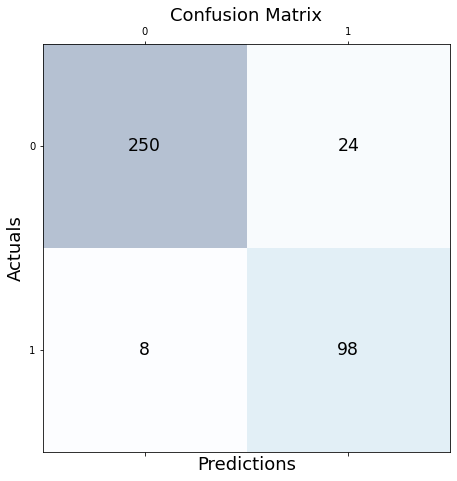

In [1477]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1478]:
imbalance_conf = confusion_matrix(y2test,imbalance_predict)
imbalance_conf

array([[261,  13],
       [ 22,  84]], dtype=int64)

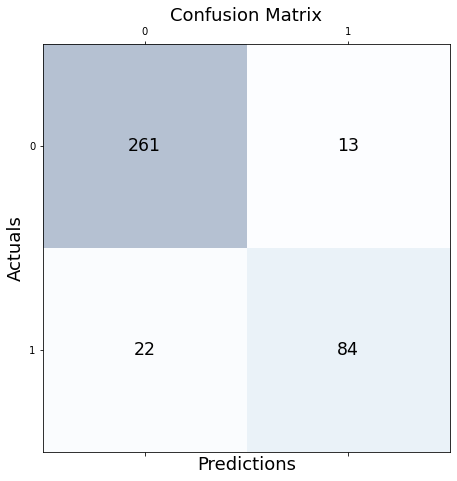

In [1479]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1480]:
print(classification_report(y2test,balance_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       274
           1       0.80      0.92      0.86       106

    accuracy                           0.92       380
   macro avg       0.89      0.92      0.90       380
weighted avg       0.92      0.92      0.92       380



In [1481]:
print(classification_report(y2test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       274
           1       0.87      0.79      0.83       106

    accuracy                           0.91       380
   macro avg       0.89      0.87      0.88       380
weighted avg       0.91      0.91      0.91       380



# naive bayes

In [1482]:
x2train,x2test,y2train,y2test = train_test_split(x,y,test_size = .40,random_state = 1)
reg.fit(x2train,y2train)

MultinomialNB()

In [1483]:
predict = reg.predict(x2test)

In [1484]:
accuracy = accuracy_score(y2test,predict)

In [1485]:
n2_accuracy = accuracy*100
n2_accuracy

83.94736842105263

In [1486]:
print(classification_report(y2test,predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       274
           1       0.69      0.76      0.73       106

    accuracy                           0.84       380
   macro avg       0.80      0.82      0.81       380
weighted avg       0.85      0.84      0.84       380



# spliting .20

In [1487]:
x3train,x3test,y3train,y3test = train_test_split(x_stand,y,test_size = .20,random_state = 1)

# balanced data

In [1488]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x3train, y3train)

In [1489]:
balance_lr.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [1490]:
imbalance_lr.fit(x3train,y3train)

LogisticRegression()

In [1491]:
balance_predict = balance_lr.predict(x3test)

In [1492]:
imbalance_predict = imbalance_lr.predict(x3test)

In [1493]:
balance_accuracy = accuracy_score(y3test,balance_predict)

In [1494]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict)

In [1495]:
balance_l3_accuracy = balance_accuracy*100
balance_l3_accuracy

88.42105263157895

In [1496]:
imbalance_l3_accuracy = balance_accuracy*100
imbalance_l3_accuracy

88.42105263157895

In [1497]:
print(classification_report(y3test,balance_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       135
           1       0.77      0.85      0.81        55

    accuracy                           0.88       190
   macro avg       0.85      0.88      0.86       190
weighted avg       0.89      0.88      0.89       190



In [1498]:
print(classification_report(y3test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       135
           1       0.85      0.80      0.82        55

    accuracy                           0.90       190
   macro avg       0.88      0.87      0.88       190
weighted avg       0.90      0.90      0.90       190



# SVM

In [1499]:
balance_model.fit(X_train_SMOTE,y_train_SMOTE)

SVC()

In [1500]:
imbalance_model.fit(x3train,y3train)

SVC()

In [1501]:
balance_predict = balance_model.predict(x3test)

In [1502]:
imbalance_predict = imbalance_model.predict(x3test)

In [1503]:
balance_accuracy = accuracy_score(y3test,balance_predict)

In [1504]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict)

In [1505]:
balance_s3_accuracy = balance_accuracy*100
balance_s3_accuracy

93.15789473684211

In [1506]:
balance_conf = confusion_matrix(y3test,balance_predict)
balance_conf

array([[130,   5],
       [  8,  47]], dtype=int64)

In [1507]:
imbalance_s3_accuracy = imbalance_accuracy*100
imbalance_s3_accuracy

90.52631578947368

In [1508]:
imbalance_conf = confusion_matrix(y3test,imbalance_predict)
imbalance_conf

array([[132,   3],
       [ 15,  40]], dtype=int64)

In [1509]:
print(classification_report(y3test,balance_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       135
           1       0.90      0.85      0.88        55

    accuracy                           0.93       190
   macro avg       0.92      0.91      0.92       190
weighted avg       0.93      0.93      0.93       190



In [1510]:
print(classification_report(y3test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       135
           1       0.93      0.73      0.82        55

    accuracy                           0.91       190
   macro avg       0.91      0.85      0.88       190
weighted avg       0.91      0.91      0.90       190



# naive bayes

In [1511]:
x3train,x3test,y3train,y3test = train_test_split(x,y,test_size = .20,random_state = 1)
reg.fit(x3train,y3train)

MultinomialNB()

In [1512]:
predict = reg.predict(x3test)

In [1513]:
accuracy = accuracy_score(y3test,predict)

In [1514]:
n3_accuracy = accuracy*100
n3_accuracy

85.26315789473684

In [1515]:
print(classification_report(y3test,predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       135
           1       0.74      0.76      0.75        55

    accuracy                           0.85       190
   macro avg       0.82      0.83      0.82       190
weighted avg       0.85      0.85      0.85       190



# Random forest

In [1516]:
from sklearn.ensemble import RandomForestClassifier

In [1517]:
balance_rfcl = RandomForestClassifier()

In [1518]:
imbalance_rfcl = RandomForestClassifier()

# split .30

In [1519]:
xtrain,xtest,ytrain,ytest = train_test_split(x_stand,y,test_size = .30,random_state = 1)
print("Before oversampling: ",Counter(ytrain))

Before oversampling:  Counter({0: 479, 1: 186})


# balance Data

In [1520]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [1521]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 479, 1: 479})


In [1522]:
balance_rfcl.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [1523]:
imbalance_rfcl.fit(xtrain,ytrain)

RandomForestClassifier()

In [1524]:
balance_predict = balance_rfcl.predict(xtest)

In [1525]:
imbalance_predict = imbalance_rfcl.predict(xtest)

In [1526]:
balance_accuracy = accuracy_score(ytest,balance_predict)
balance_rm1_accuracy = balance_accuracy*100
balance_rm1_accuracy

97.54385964912281

In [1527]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict)

In [1528]:
imbalance_rm1_accuracy = imbalance_accuracy*100
imbalance_rm1_accuracy

96.84210526315789

In [1529]:
balance_conf = confusion_matrix(ytest,balance_predict)
balance_conf

array([[202,   3],
       [  4,  76]], dtype=int64)

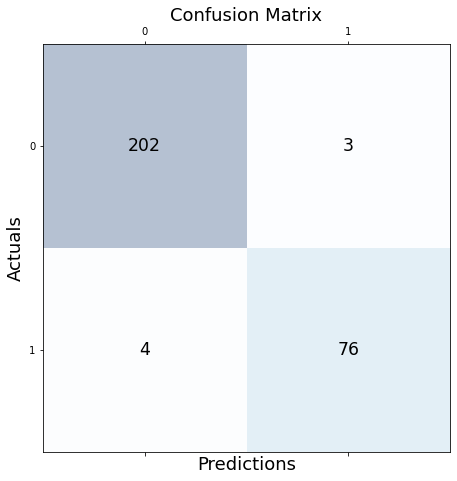

In [1530]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(balance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(balance_conf.shape[0]):
    for j in range(balance_conf.shape[1]):
        ax.text(x=j, y=i,s=balance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1531]:
imbalance_conf = confusion_matrix(ytest,imbalance_predict)
imbalance_conf

array([[202,   3],
       [  6,  74]], dtype=int64)

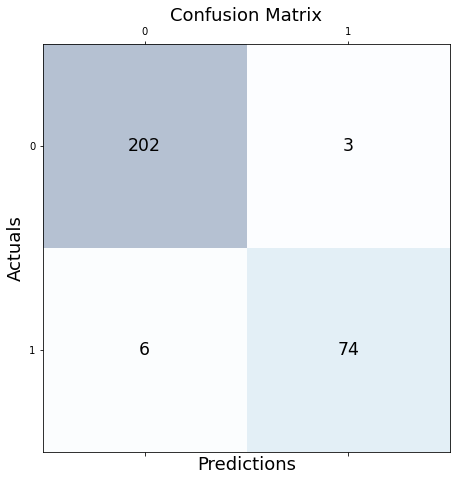

In [1532]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(imbalance_conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(imbalance_conf.shape[0]):
    for j in range(imbalance_conf.shape[1]):
        ax.text(x=j, y=i,s=imbalance_conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [1533]:
print(classification_report(ytest,balance_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       205
           1       0.96      0.95      0.96        80

    accuracy                           0.98       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.98      0.98      0.98       285



In [1534]:
print(classification_report(ytest,imbalance_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       205
           1       0.96      0.93      0.94        80

    accuracy                           0.97       285
   macro avg       0.97      0.96      0.96       285
weighted avg       0.97      0.97      0.97       285



# split .25

In [1535]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size = .25,random_state = 1)
print("Before oversampling: ",Counter(y1train))

Before oversampling:  Counter({0: 513, 1: 199})


In [1536]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x1train, y1train)

In [1537]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 513, 1: 513})


In [1538]:
balance_rfcl.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [1539]:
imbalance_rfcl.fit(x1train,y1train)

RandomForestClassifier()

In [1540]:
balance_predict = balance_rfcl.predict(x1test)

In [1541]:
imbalance_predict = imbalance_rfcl.predict(x1test)

In [1542]:
balance_accuracy = accuracy_score(y1test,balance_predict)
balance_rm2_accuracy = balance_accuracy*100
balance_rm2_accuracy

97.05882352941177

In [1543]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict)
imbalance_rm2_accuracy = imbalance_accuracy*100
imbalance_rm2_accuracy

97.47899159663865

In [1544]:
balance_conf = confusion_matrix(y1test,balance_predict)
balance_conf

array([[168,   3],
       [  4,  63]], dtype=int64)

In [1545]:
imbalance_conf = confusion_matrix(y1test,imbalance_predict)
imbalance_conf

array([[169,   2],
       [  4,  63]], dtype=int64)

In [1546]:
print(classification_report(y1test,balance_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       171
           1       0.95      0.94      0.95        67

    accuracy                           0.97       238
   macro avg       0.97      0.96      0.96       238
weighted avg       0.97      0.97      0.97       238



In [1547]:
print(classification_report(y1test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       171
           1       0.97      0.94      0.95        67

    accuracy                           0.97       238
   macro avg       0.97      0.96      0.97       238
weighted avg       0.97      0.97      0.97       238



# spliting .40

In [1548]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size = .40,random_state = 1)

In [1549]:
print("Before oversampling: ",Counter(y2train))

Before oversampling:  Counter({0: 410, 1: 160})


# balance data

In [1550]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1551]:
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 410, 1: 410})


In [1552]:
balance_rfcl.fit(x2train,y2train)

RandomForestClassifier()

In [1553]:
imbalance_rfcl.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [1554]:
balance_predict = balance_rfcl.predict(x2test)

In [1555]:
imbalance_predict = imbalance_rfcl.predict(x2test)

In [1556]:
balance_accuracy = accuracy_score(y2test,balance_predict)
balance_rm3_accuracy = balance_accuracy*100
balance_rm3_accuracy

95.78947368421052

In [1557]:
imbalance_accuracy = accuracy_score(y2test,imbalance_predict)
imbalance_rm3_accuracy = imbalance_accuracy*100
imbalance_rm3_accuracy

95.78947368421052

In [1558]:
balance_conf = confusion_matrix(y2test,balance_predict)
balance_conf

array([[264,  10],
       [  6, 100]], dtype=int64)

In [1559]:
imbalance_conf = confusion_matrix(y2test,imbalance_predict)
imbalance_conf

array([[265,   9],
       [  7,  99]], dtype=int64)

In [1560]:
print(classification_report(y2test,balance_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       274
           1       0.91      0.94      0.93       106

    accuracy                           0.96       380
   macro avg       0.94      0.95      0.95       380
weighted avg       0.96      0.96      0.96       380



In [1561]:
print(classification_report(y2test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       274
           1       0.92      0.93      0.93       106

    accuracy                           0.96       380
   macro avg       0.95      0.95      0.95       380
weighted avg       0.96      0.96      0.96       380



# spliting .20

In [1562]:
x3train,x3test,y3train,y3test = train_test_split(x_stand,y,test_size = .20,random_state = 1)

In [1563]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x3train, y3train)

In [1564]:
balance_rfcl.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [1565]:
imbalance_rfcl.fit(x3train,y3train)

RandomForestClassifier()

In [1566]:
balance_predict = balance_rfcl.predict(x3test)

In [1567]:
imbalance_predict = imbalance_rfcl.predict(x3test)

In [1568]:
balance_accuracy = accuracy_score(y3test,balance_predict)
balance_rm4_accuracy = balance_accuracy*100
balance_rm4_accuracy

96.84210526315789

In [1569]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict)
imbalance_rm4_accuracy = imbalance_accuracy*100
imbalance_rm4_accuracy

96.84210526315789

In [1570]:
print(classification_report(y3test,balance_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       135
           1       0.95      0.95      0.95        55

    accuracy                           0.97       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.97      0.97      0.97       190



In [1571]:
print(classification_report(y3test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       135
           1       0.95      0.95      0.95        55

    accuracy                           0.97       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.97      0.97      0.97       190



# Linear Regression

In [1572]:
from sklearn.linear_model import LinearRegression
balance_regr = linear_model.LinearRegression()
imbalance_regr = linear_model.LinearRegression()

# spliting 0.40

In [1573]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size = .40,random_state = 1)
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1574]:
balance_regr.fit(X_train_SMOTE,X_train_SMOTE)

LinearRegression()

In [1575]:
balance_regr.fit(X_train_SMOTE,y_train_SMOTE)

LinearRegression()

In [1576]:
imbalance_regr.fit(x2train,y2train)

LinearRegression()

In [1577]:
balance_predict=balance_regr.predict(x2test)
balance_regr.score(x2test,y2test)

0.42419773315434206

In [1578]:
imbalance_predict=imbalance_regr.predict(x2test)
imbalance_regr.score(x2test,y2test)

0.5119236863721405

In [1579]:
balance_accuracy = accuracy_score(y2test,balance_predict.round())
balance_lin40_accuracy = balance_accuracy*100
balance_lin40_accuracy

86.31578947368422

In [1580]:
imbalance_accuracy = accuracy_score(y2test,imbalance_predict.round())
imbalance_lin40_accuracy = imbalance_accuracy*100
imbalance_lin40_accuracy

88.68421052631578

In [1581]:
balance_conf = confusion_matrix(y2test,balance_predict.round())
balance_conf

array([[235,  39],
       [ 13,  93]], dtype=int64)

In [1582]:
imbalance_conf = confusion_matrix(y2test,imbalance_predict.round())
imbalance_conf

array([[249,  25],
       [ 18,  88]], dtype=int64)

In [1583]:
print(classification_report(y2test,balance_predict.round()))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       274
           1       0.70      0.88      0.78       106

    accuracy                           0.86       380
   macro avg       0.83      0.87      0.84       380
weighted avg       0.88      0.86      0.87       380



In [1584]:
print(classification_report(y2test,imbalance_predict.round()))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       274
           1       0.78      0.83      0.80       106

    accuracy                           0.89       380
   macro avg       0.86      0.87      0.86       380
weighted avg       0.89      0.89      0.89       380



# spliting 0.30

In [1585]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [1586]:
balance_regr.fit(X_train_SMOTE,y_train_SMOTE)
imbalance_regr.fit(xtrain,ytrain)
balance_predict=balance_regr.predict(xtest)
imbalance_predict=imbalance_regr.predict(xtest)

In [1587]:
balance_regr.score(xtest,ytest)

0.501155680596106

In [1588]:
imbalance_regr.score(xtest,ytest)

0.5811652735195916

In [1589]:
balance_accuracy = accuracy_score(ytest,balance_predict.round())
balance_lin30_accuracy = balance_accuracy*100
balance_lin30_accuracy

89.47368421052632

In [1590]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict.round())
imbalance_lin30_accuracy = imbalance_accuracy*100
imbalance_lin30_accuracy

90.87719298245615

In [1591]:
confusion_matrix(ytest,balance_predict.round())

array([[184,  21],
       [  9,  71]], dtype=int64)

In [1592]:
confusion_matrix(ytest,imbalance_predict.round())

array([[192,  13],
       [ 13,  67]], dtype=int64)

In [1593]:
print(classification_report(ytest,balance_predict.round()))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       205
           1       0.77      0.89      0.83        80

    accuracy                           0.89       285
   macro avg       0.86      0.89      0.88       285
weighted avg       0.90      0.89      0.90       285



In [1594]:
print(classification_report(ytest,imbalance_predict.round()))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       205
           1       0.84      0.84      0.84        80

    accuracy                           0.91       285
   macro avg       0.89      0.89      0.89       285
weighted avg       0.91      0.91      0.91       285



# spliting 0.25

In [1595]:
x1train,x1test,y1train,y1test = train_test_split(x_stand,y,test_size = .25,random_state = 1)

In [1596]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x1train, y1train)
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 513, 1: 513})


In [1597]:
imbalance_regr.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_regr.predict(x1test)
balance_regr.score(x1test,y1test)

0.49438521612690256

In [1598]:
balance_accuracy = accuracy_score(y1test,balance_predict.round())
balance_lin25_accuracy = accuracy*100
balance_lin25_accuracy

85.26315789473684

In [1599]:
imbalance_regr.fit(x1train,y1train)
imbalance_predict=imbalance_regr.predict(x1test)
imbalance_regr.score(x1test,y1test)

0.5692582629826775

In [1600]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict.round())
imbalance_lin25_accuracy = imbalance_accuracy*100
imbalance_lin25_accuracy

91.59663865546219

In [1601]:
confusion_matrix(y1test,balance_predict.round())

array([[154,  17],
       [  9,  58]], dtype=int64)

In [1602]:
confusion_matrix(y1test,imbalance_predict.round())

array([[161,  10],
       [ 10,  57]], dtype=int64)

In [1603]:
print(classification_report(y1test,balance_predict.round()))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       171
           1       0.77      0.87      0.82        67

    accuracy                           0.89       238
   macro avg       0.86      0.88      0.87       238
weighted avg       0.90      0.89      0.89       238



In [1604]:
print(classification_report(y1test,imbalance_predict.round()))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       171
           1       0.85      0.85      0.85        67

    accuracy                           0.92       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.92      0.92      0.92       238



# spliting 0.20

In [1605]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x3train, y3train)

In [1606]:
balance_regr.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_regr.predict(x3test)
balance_regr.score(x3test,y3test)

0.5306982369661946

In [1607]:
balance_accuracy = accuracy_score(y3test,balance_predict.round())
balance_lin20_accuracy = balance_accuracy*100
balance_lin20_accuracy

87.89473684210526

In [1608]:
imbalance_regr.fit(x3train,y3train)
imbalance_predict=imbalance_regr.predict(x3test)
imbalance_regr.score(x3test,y3test)

0.5598023361547363

In [1609]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict.round())
imbalance_lin20_accuracy = imbalance_accuracy*100
imbalance_lin20_accuracy

91.05263157894737

In [1610]:
confusion_matrix(y3test,balance_predict.round())

array([[121,  14],
       [  9,  46]], dtype=int64)

In [1611]:
confusion_matrix(y3test,imbalance_predict.round())

array([[127,   8],
       [  9,  46]], dtype=int64)

In [1612]:
print(classification_report(y3test,balance_predict.round()))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       135
           1       0.77      0.84      0.80        55

    accuracy                           0.88       190
   macro avg       0.85      0.87      0.86       190
weighted avg       0.88      0.88      0.88       190



In [1613]:
print(classification_report(y3test,imbalance_predict.round()))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       135
           1       0.85      0.84      0.84        55

    accuracy                           0.91       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.91      0.91      0.91       190



# Decision Tree

In [1614]:
from sklearn import tree
balance_classify = tree.DecisionTreeClassifier()
imbalance_classify = tree.DecisionTreeClassifier()

# Spliting 0.40

In [1615]:
x2train,x2test,y2train,y2test = train_test_split(x_stand,y,test_size = .40,random_state = 1)
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1616]:
balance_classify.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_classify.predict(x2test)
balance_classify.score(x2test,y2test)

0.9657894736842105

In [1617]:
imbalance_classify.fit(x2train,y2train)
imbalance_predict = imbalance_classify.predict(x2test)
imbalance_classify.score(x2test,y2test)

0.9552631578947368

In [1618]:
balance_accuracy = accuracy_score(y2test,balance_predict)
balance_des40_accuracy = balance_accuracy*100
balance_des40_accuracy

96.57894736842105

In [1619]:
imbalance_accuracy = accuracy_score(y2test,imbalance_predict)
imbalance_des40_accuracy = imbalance_accuracy*100
imbalance_des40_accuracy

95.52631578947368

In [1620]:
confusion_matrix(y2test,balance_predict)

array([[270,   4],
       [  9,  97]], dtype=int64)

In [1621]:
confusion_matrix(y2test,imbalance_predict)

array([[266,   8],
       [  9,  97]], dtype=int64)

In [1622]:
print(classification_report(y2test,balance_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       274
           1       0.96      0.92      0.94       106

    accuracy                           0.97       380
   macro avg       0.96      0.95      0.96       380
weighted avg       0.97      0.97      0.97       380



In [1623]:
print(classification_report(y2test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       274
           1       0.92      0.92      0.92       106

    accuracy                           0.96       380
   macro avg       0.95      0.94      0.94       380
weighted avg       0.96      0.96      0.96       380



# Spliting 0.30

In [1624]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [1625]:
balance_classify.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_classify.predict(xtest)
balance_classify.score(xtest,ytest)

0.9438596491228071

In [1626]:
imbalance_classify.fit(xtrain,ytrain)
imbalance_predict=imbalance_classify.predict(xtest)
imbalance_classify.score(xtest,ytest)

0.9403508771929825

In [1627]:
balance_accuracy = accuracy_score(ytest,balance_predict)
balance_des30_accuracy = balance_accuracy*100
balance_des30_accuracy

94.38596491228071

In [1628]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict)
imbalance_des30_accuracy = imbalance_accuracy*100
imbalance_des30_accuracy

94.03508771929825

In [1629]:
confusion_matrix(ytest,balance_predict)

array([[195,  10],
       [  6,  74]], dtype=int64)

In [1630]:
print(classification_report(ytest,balance_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       205
           1       0.88      0.93      0.90        80

    accuracy                           0.94       285
   macro avg       0.93      0.94      0.93       285
weighted avg       0.95      0.94      0.94       285



In [1631]:
print(classification_report(ytest,imbalance_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       205
           1       0.88      0.91      0.90        80

    accuracy                           0.94       285
   macro avg       0.92      0.93      0.93       285
weighted avg       0.94      0.94      0.94       285



# Spliting 0.25

In [1632]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x1train, y1train)

In [1633]:
balance_classify.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_classify.predict(x1test)
balance_classify.score(x1test,y1test)

0.957983193277311

In [1634]:
imbalance_classify.fit(x1train,y1train)
imbalance_predict=imbalance_classify.predict(x1test)
imbalance_classify.score(x1test,y1test)

0.9537815126050421

In [1635]:
balance_accuracy = accuracy_score(y1test,balance_predict)
balance_des25_accuracy = balance_accuracy*100
balance_des25_accuracy

95.7983193277311

In [1636]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict)
imbalance_des25_accuracy = imbalance_accuracy*100
imbalance_des25_accuracy

95.37815126050421

In [1637]:
confusion_matrix(y1test,balance_predict)

array([[168,   3],
       [  7,  60]], dtype=int64)

In [1638]:
confusion_matrix(y1test,imbalance_predict)

array([[167,   4],
       [  7,  60]], dtype=int64)

In [1639]:
print(classification_report(y1test,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       171
           1       0.95      0.90      0.92        67

    accuracy                           0.96       238
   macro avg       0.96      0.94      0.95       238
weighted avg       0.96      0.96      0.96       238



In [1640]:
print(classification_report(y1test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       171
           1       0.94      0.90      0.92        67

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



# Spliting 0.20

In [1641]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x3train, y3train)

In [1642]:
balance_classify.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict=balance_classify.predict(x3test)
balance_classify.score(x3test,y3test)

0.9578947368421052

In [1643]:
imbalance_classify.fit(x3train,y3train)
imbalance_predict=imbalance_classify.predict(x3test)
imbalance_classify.score(x3test,y3test)

0.9526315789473684

In [1644]:
balance_accuracy = accuracy_score(y3test,balance_predict)
balance_des20_accuracy = balance_accuracy*100
balance_des20_accuracy

95.78947368421052

In [1645]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict)
imbalance_des20_accuracy = imbalance_accuracy*100
imbalance_des20_accuracy

95.26315789473684

In [1646]:
confusion_matrix(y3test,balance_predict)

array([[132,   3],
       [  5,  50]], dtype=int64)

In [1647]:
confusion_matrix(y3test,imbalance_predict)

array([[132,   3],
       [  6,  49]], dtype=int64)

In [1648]:
print(classification_report(y3test,balance_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.94      0.91      0.93        55

    accuracy                           0.96       190
   macro avg       0.95      0.94      0.95       190
weighted avg       0.96      0.96      0.96       190



In [1649]:
print(classification_report(y3test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.94      0.89      0.92        55

    accuracy                           0.95       190
   macro avg       0.95      0.93      0.94       190
weighted avg       0.95      0.95      0.95       190



# KNN

In [1650]:
from sklearn.neighbors import KNeighborsClassifier
balance_classifier = KNeighborsClassifier()
imbalance_classifier = KNeighborsClassifier()

# Spliting 0.40

In [1651]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x2train, y2train)

In [1652]:
balance_classifier.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict = balance_classifier.predict(x2test)
balance_classifier.score(x2test,y2test)

0.8868421052631579

In [1653]:
imbalance_classifier.fit(x2train,y2train)
imbalance_predict = imbalance_classifier.predict(x2test)
imbalance_classifier.score(x2test,y2test)

0.881578947368421

In [1654]:
balance_accuracy = accuracy_score(y2test,balance_predict)
balance_knn40_accuracy = balance_accuracy*100
balance_knn40_accuracy

88.68421052631578

In [1655]:
imbalance_accuracy = accuracy_score(y2test,imbalance_predict)
imbalance_knn40_accuracy = imbalance_accuracy*100
imbalance_knn40_accuracy

88.1578947368421

In [1656]:
confusion_matrix(y2test,balance_predict)

array([[236,  38],
       [  5, 101]], dtype=int64)

In [1657]:
confusion_matrix(y2test,imbalance_predict)

array([[254,  20],
       [ 25,  81]], dtype=int64)

In [1658]:
print(classification_report(y2test,balance_predict))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       274
           1       0.73      0.95      0.82       106

    accuracy                           0.89       380
   macro avg       0.85      0.91      0.87       380
weighted avg       0.91      0.89      0.89       380



In [1659]:
print(classification_report(y2test,imbalance_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       274
           1       0.80      0.76      0.78       106

    accuracy                           0.88       380
   macro avg       0.86      0.85      0.85       380
weighted avg       0.88      0.88      0.88       380



# Spliting 0.30

In [1660]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [1661]:
balance_classifier.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict = balance_classifier.predict(xtest)
balance_classifier.score(xtest,ytest)

0.9192982456140351

In [1662]:
imbalance_classifier.fit(xtrain,ytrain)
imbalance_predict=imbalance_classifier.predict(xtest)
imbalance_classifier.score(xtest,ytest)

0.8912280701754386

In [1663]:
balance_accuracy = accuracy_score(ytest,balance_predict)
balance_knn30_accuracy = balance_accuracy*100
balance_knn30_accuracy

91.9298245614035

In [1664]:
imbalance_accuracy = accuracy_score(ytest,imbalance_predict)
imbalance_knn30_accuracy = imbalance_accuracy*100
imbalance_knn30_accuracy

89.12280701754386

In [1665]:
confusion_matrix(ytest,balance_predict)

array([[185,  20],
       [  3,  77]], dtype=int64)

In [1666]:
confusion_matrix(ytest,imbalance_predict)

array([[191,  14],
       [ 17,  63]], dtype=int64)

# Spliting 0.25

In [1667]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x1train, y1train)

In [1668]:
balance_classifier.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict = balance_classifier.predict(x1test)
balance_classifier.score(x1test,y1test)

0.907563025210084

In [1669]:
balance_accuracy = accuracy_score(y1test,balance_predict)
balance_knn25_accuracy = balance_accuracy*100
balance_knn25_accuracy

90.75630252100841

In [1670]:
imbalance_classifier.fit(x1train,y1train)
imbalance_predict = imbalance_classifier.predict(x1test)
imbalance_classifier.score(x1test,y1test)

0.8991596638655462

In [1671]:
imbalance_accuracy = accuracy_score(y1test,imbalance_predict)
imbalance_knn25_accuracy = imbalance_accuracy*100
imbalance_knn25_accuracy

89.91596638655463

In [1672]:
confusion_matrix(y1test,balance_predict)

array([[152,  19],
       [  3,  64]], dtype=int64)

In [1673]:
confusion_matrix(y1test,imbalance_predict)

array([[161,  10],
       [ 14,  53]], dtype=int64)

# Split .20

In [1674]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x3train, y3train)

In [1675]:
balance_classifier.fit(X_train_SMOTE,y_train_SMOTE)
balance_predict = balance_classifier.predict(x3test)
balance_classifier.score(x3test,y3test)

0.9368421052631579

In [1676]:
balance_accuracy = accuracy_score(y3test,balance_predict)
balance_knn20_accuracy = balance_accuracy*100
balance_knn20_accuracy

93.6842105263158

In [1677]:
imbalance_classifier.fit(x3train,y3train)
imbalance_predict = imbalance_classifier.predict(x3test)
imbalance_classifier.score(x3test,y3test)

0.9157894736842105

In [1678]:
imbalance_accuracy = accuracy_score(y3test,imbalance_predict.round())
imbalance_knn20_accuracy = imbalance_accuracy*100
imbalance_knn20_accuracy

91.57894736842105

In [1679]:
confusion_matrix(y3test,balance_predict.round())

array([[126,   9],
       [  3,  52]], dtype=int64)

In [1680]:
confusion_matrix(y3test,imbalance_predict.round())

array([[129,   6],
       [ 10,  45]], dtype=int64)

# model comparison

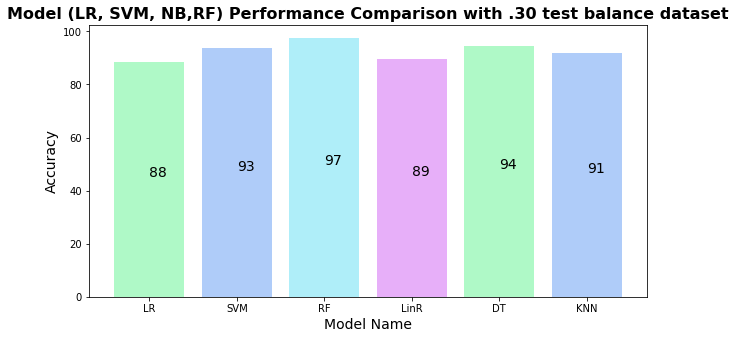

In [1681]:
accuracy1 = [balance_l_accuracy, balance_s_accuracy,balance_rm1_accuracy,balance_lin30_accuracy,balance_des30_accuracy,balance_knn30_accuracy]
model_names = ['LR', 'SVM','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

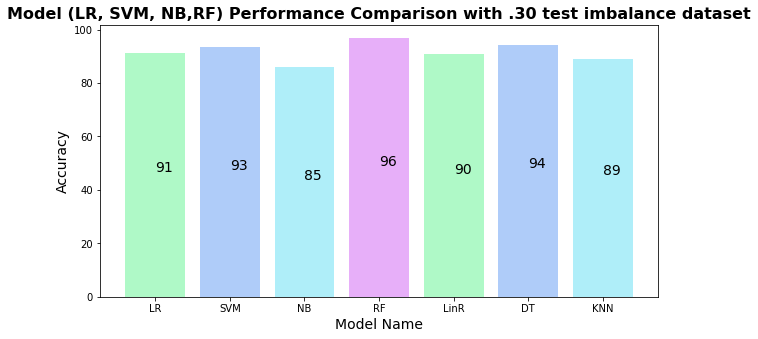

In [1682]:
imbalance_accuracy1 = [imbalance_l_accuracy,imbalance_s_accuracy,n_accuracy,imbalance_rm1_accuracy,imbalance_lin30_accuracy,imbalance_des30_accuracy,imbalance_knn30_accuracy]
model_names = ['LR', 'SVM','NB','RF','LinR','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, imbalance_accuracy1, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .30 test imbalance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

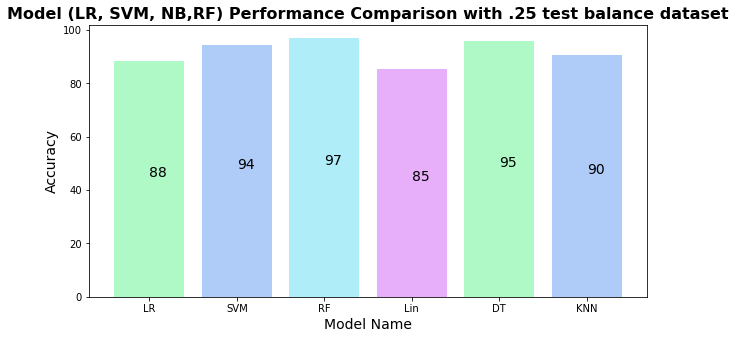

In [1683]:
accuracy2 = [balance_l1_accuracy, balance_s1_accuracy,balance_rm2_accuracy,balance_lin25_accuracy,balance_des25_accuracy,balance_knn25_accuracy]
model_names = ['LR', 'SVM','RF','Lin','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy2, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .25 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

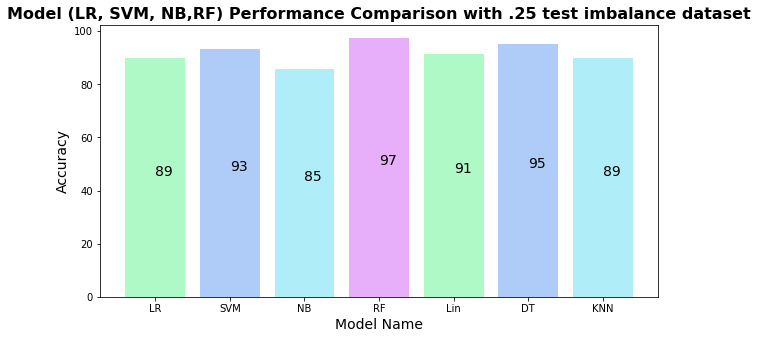

In [1684]:
imbalnce_accuracy2 = [imbalance_l1_accuracy, imbalance_s1_accuracy,n1_accuracy,imbalance_rm2_accuracy,imbalance_lin25_accuracy,imbalance_des25_accuracy,imbalance_knn25_accuracy]
model_names = ['LR', 'SVM','NB','RF','Lin','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, imbalnce_accuracy2, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .25 test imbalance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

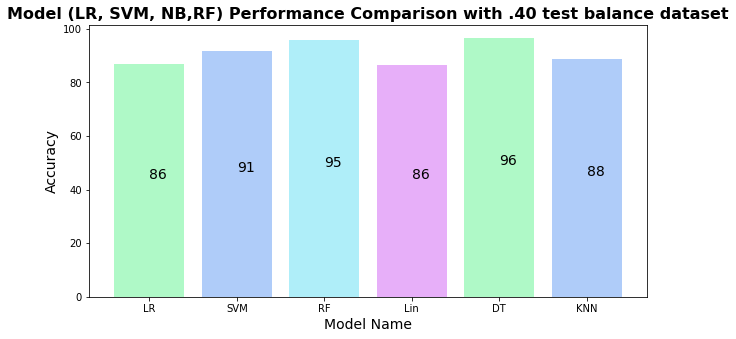

In [1685]:
accuracy3 = [balance_l2_accuracy, balance_s2_accuracy,balance_rm3_accuracy,balance_lin40_accuracy,balance_des40_accuracy,balance_knn40_accuracy]
model_names = ['LR', 'SVM','RF','Lin','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy3, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .40 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

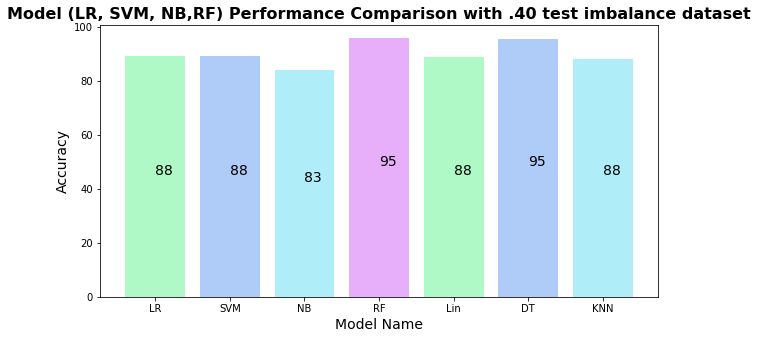

In [1686]:
imbalance_accuracy3 = [imbalance_l2_accuracy, imbalance_s2_accuracy,n2_accuracy,imbalance_rm3_accuracy,imbalance_lin40_accuracy,imbalance_des40_accuracy,imbalance_knn40_accuracy]
model_names = ['LR', 'SVM','NB','RF','Lin','DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, imbalance_accuracy3, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .40 test imbalance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

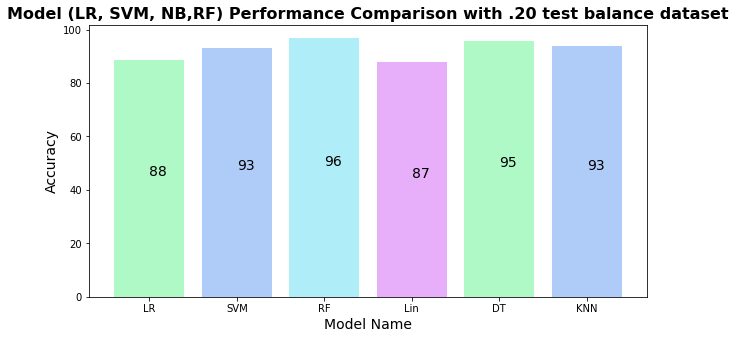

In [1687]:
accuracy4 = [balance_l3_accuracy, balance_s3_accuracy, balance_rm4_accuracy , balance_lin20_accuracy, balance_des20_accuracy, balance_knn20_accuracy]
model_names = ['LR', 'SVM', 'RF' , 'Lin' , 'DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, accuracy4, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .20 test balance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

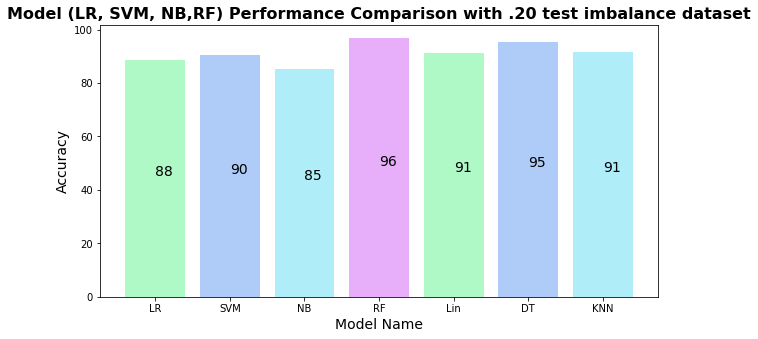

In [1689]:
imbalance_accuracy4 = [imbalance_l3_accuracy, imbalance_s3_accuracy,n3_accuracy,imbalance_rm4_accuracy , imbalance_lin20_accuracy, imbalance_des20_accuracy, imbalance_knn20_accuracy]
model_names = ['LR', 'SVM','NB', 'RF' , 'Lin' , 'DT','KNN']

total_bar = np.arange(len(model_names))
color = ['#95f7b5', '#95bcf7', '#95e9f7','#df95f7']

fig, ax = plt.subplots(figsize=(10, 5))
bar = plt.bar(model_names, imbalance_accuracy4, align='center', alpha=.75, color=color)

plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, SVM, NB,RF) Performance Comparison with .20 test imbalance dataset', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()